In [1]:
from shallownetwork import ShallowNetwork
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# List 5: Problem 3

Fit a shallow neural network with 2-4 hidden units to the supplied data. This time, use Chi-squared as the loss function.

Loading and preparing the data.

In [2]:
data = pd.read_csv('sin.dat', names=['X', 'Y', 'DY'], sep='\t')

In [3]:
data.head()

,X,Y,DY
0,0.125664,0.253336,0.098665
1,0.251327,0.281187,0.199361
2,0.376991,0.250813,0.124933
3,0.502655,0.677263,0.172386
4,0.628319,0.764359,0.119524


In [4]:
X = data.X.values.reshape(-1,1)
Y = data.Y.values.reshape(-1,1)
DY = data.DY.values.reshape(-1,1)

Let's define a function to initialize, train and visualize network. It takes parameters:
  1. Loss function
  1. Optimizer
  1. Epochs
  1. X
  1. Y
  1. DY
  1. Size of a batch
  1. Number of hidden units
  1. Learning rate
  1. verbose
  1. message_frequency

In [5]:
def train_and_visualize(loss, optimizer, epochs, X, Y, DY, batch_size, hidden_units, learning_rate,
                       verbose=True, message_frequency=1):
  network = ShallowNetwork(input_dim=1, hidden_dim=hidden_units, output_dim=1)
  network.compile(loss_name=loss, optimizer=optimizer)
  network.fit(X, Y, epochs=epochs, batch_size=batch_size, learning_rate=learning_rate,
              verbose=verbose, message_frequency=message_frequency, DY=DY)
  plt.plot(X, network(X), label='Prediction', c='red')
  plt.errorbar(X, Y, yerr=DY, label='Ground truth', c='g', fmt='.k')
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.title(f'Prediction for {loss} and {hidden_units} units.')
  plt.legend()
  plt.show()

We will use the Chi-squared loss function and optimizing the network with Gradient Descent algorithm.

## 2 hidden units

Epoch: 1 Loss function: 17329.390549215015
Epoch: 10001 Loss function: 348.782954173789
Epoch: 20001 Loss function: 293.84872022367404
Epoch: 30001 Loss function: 223.3020475322358
Epoch: 40001 Loss function: 182.88848842654957
Epoch: 50001 Loss function: 177.0723295086376
Epoch: 60001 Loss function: 174.28237695002395
Epoch: 70001 Loss function: 172.27993631163778
Epoch: 80001 Loss function: 170.86386161253975
Epoch: 90001 Loss function: 169.7434402368757
Epoch: 100001 Loss function: 168.85640728310068
Epoch: 110001 Loss function: 168.16097431229778
Epoch: 120001 Loss function: 167.6123574350259
Epoch: 130001 Loss function: 167.16321922680757
Epoch: 140001 Loss function: 166.80113987230683
Epoch: 150001 Loss function: 166.51260044849187
Epoch: 160001 Loss function: 166.2792457394651
Epoch: 170001 Loss function: 166.08020109534417
Epoch: 180001 Loss function: 165.9075887731022
Epoch: 190001 Loss function: 165.74855192737223
Epoch: 200001 Loss function: 165.55668391010587
Epoch: 210001 

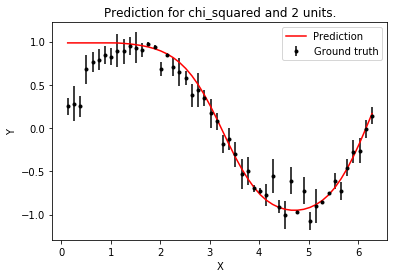

In [43]:
train_and_visualize(loss='chi_squared', optimizer='GD', epochs=250000, X=X, Y=Y, DY=DY, batch_size=-1,
                    hidden_units=2, learning_rate=0.00001, verbose=True, message_frequency=10000)

## 3 hidden units

Epoch: 1 Loss function: 17828.717653637323
Epoch: 10001 Loss function: 317.66052591077596
Epoch: 20001 Loss function: 209.592040691104
Epoch: 30001 Loss function: 120.02746864037671
Epoch: 40001 Loss function: 74.52121707567595
Epoch: 50001 Loss function: 54.38394088230973
Epoch: 60001 Loss function: 45.473989481518394
Epoch: 70001 Loss function: 41.29453648063671
Epoch: 80001 Loss function: 39.13646467078549
Epoch: 90001 Loss function: 37.91690436610408
Final loss function: 37.21419343783735


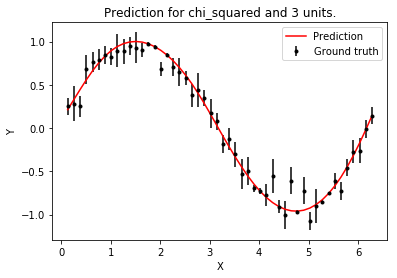

In [11]:
train_and_visualize(loss='chi_squared', optimizer='GD', epochs=100000, X=X, Y=Y, DY=DY, batch_size=-1,
                    hidden_units=3, learning_rate=0.00001, verbose=True, message_frequency=10000)

## 4 hidden units

Epoch: 1 Loss function: 18250.67609760934
Epoch: 10001 Loss function: 325.07991879972093
Epoch: 20001 Loss function: 207.91455904032046
Epoch: 30001 Loss function: 162.8093349290637
Epoch: 40001 Loss function: 105.92032312625018
Epoch: 50001 Loss function: 75.39421551341658
Epoch: 60001 Loss function: 58.46100112142902
Epoch: 70001 Loss function: 49.0379062981439
Epoch: 80001 Loss function: 43.55602916030165
Epoch: 90001 Loss function: 40.44730183310032
Final loss function: 39.36847330525692


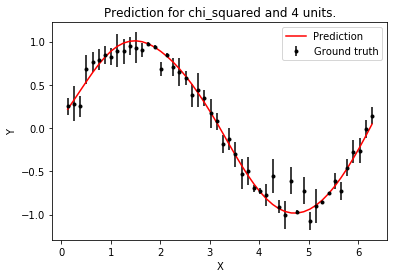

In [19]:
train_and_visualize(loss='chi_squared', optimizer='GD', epochs=100000, X=X, Y=Y, DY=DY, batch_size=-1,
                    hidden_units=4, learning_rate=0.000005, verbose=True, message_frequency=10000)

The change of loss from MSE to Chi-square leads to less stable training. It requires more training attempts to find a proper solution.